H3ath
### Josh Barrios 9/11/2020

Check validity of newly generated training dataset by viewing a set of images with tracking points overlayed

Set parameters

In [1]:
hdf_path = '../data/training_data_v3/images_ds.h5'
csv_path = '../data/training_data_v3/trck_pts.csv'

num_points = 8
num_example_images = 16

Read in images and tracking points

In [2]:
# Import database of images
import h5py
hdf_file = h5py.File(hdf_path, 'r')
for gname, group in hdf_file.items():
    for dname, ds in group.items():
        images = ds

# Import tracking points
import numpy as np
from numpy import genfromtxt
trck_pts = genfromtxt(csv_path, delimiter=',')
trck_pts = np.transpose(trck_pts)
trck_pts = trck_pts.reshape(np.int(trck_pts.shape[0] / num_points), num_points, 2)

Grab 9 random images and the corresponding points

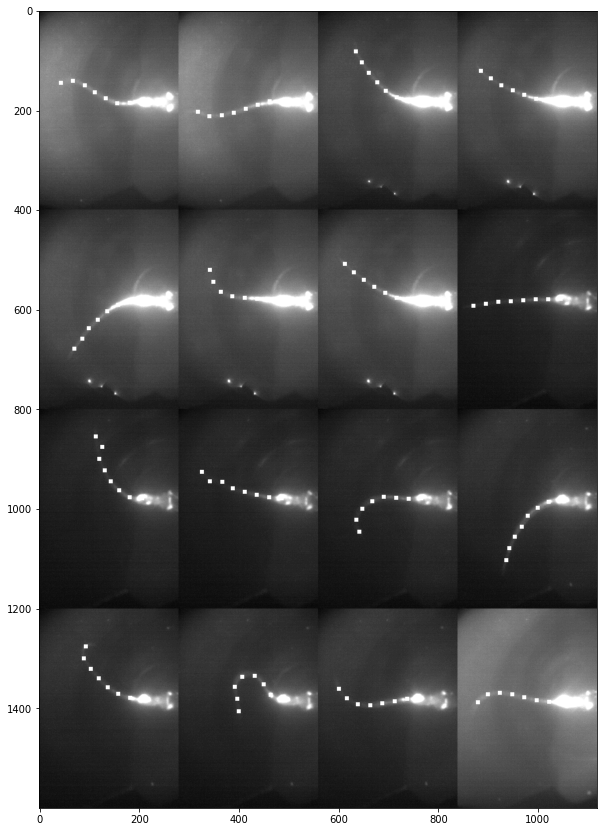

In [5]:
import random
num_images = images.shape[0]
image_indices = random.sample(list(np.linspace(0, num_images - 1, num_images)), num_example_images)
image_indices = np.sort(np.uint16(image_indices))

example_images = images[image_indices, :, :]
example_images = np.transpose(example_images, (0, 2, 1))

example_points = np.uint16(trck_pts[image_indices, :, :])

ind = 0
for image in example_images:
    pts = example_points[ind, :, :]
    for pt in pts:
        example_images[ind, pt[0] - 4:pt[0] + 4, pt[1] - 4:pt[1] + 4] = 255
    ind = ind + 1

from skimage.util import montage
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,20)
plt.imshow(montage(example_images), cmap='gray')